# Setup

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


# Variables
Tensors in TF are immutable stateless objects. Machine learning models, however, must have changing state: as your model trains, the same codes compute predictions should behave differently overtime (hopefully with a lower lost!). To represent this state, which needs to change over the course of your computation, you can choose to reply on the fact that Python is a stateful programming language:

In [3]:
#Using Python state
x = tf.zeros([10,10])
x += 2
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


Use <code> tf.Variable </code> to represent weights in the model, epcapsulate a state of a tensor


In [6]:
v = tf.Variable(1.0)

#User Python 'assert' as a debugging statement to test the condition
assert v.numpy() == 1.0

#Reassign the value 
v.assign(3.0)
assert v.numpy() == 3.0

#User 'v' in a TensorFlow 'tf.square()' operation and reaissng
v.assign(tf.square(v))
assert v.numpy() ==9.0

Computation using <code>tf.Variable</code> are automatically traced when computing gradients. For variables that represent embeddings, TensorFlow will do sparrse updates by default, which are more computation and memory efficcient.
A <code>tf.Variable</code> is also a way to show a reader of your code that a piece of state is mutable.

# Fit a linear model
Let's use the concepts you have learned so far <b>Tensor</b>, <b>Variable</b>, and <b>GradientTape</b> - to build and train a simple model. This typically involves a few steps:
1. Define the model
2. Define a loss function.
3. Obtain training data.
4. Run through the training data and use an 'optimizer' to adjust the variables to fit the data.

Here, you'll create a simple linear model, <b>f(x) = x * W + b </b>

which has two variables: <b>w</b> weights and <b>b</b> bias

You'll synthesize data such that a well trained model would have <b>W = 3.0</b> and <b>b = 2.0</b>

# Define the model
Let's define a simple class to encapsulate the variables and the computation:

In [7]:
class Model(object):

    def __init__(self):
        #Initialize the weights to 5.0 and bias to 2.0
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.W * x + self.b

model = Model()

In [9]:
assert model(3.0).numpy() == 15.0

# Define a loss function

A loss function measures how well the output of a model for a given input matches the target output. The goal is to minimize the difference during training. Let's use the standard L2 loss, also known as the least square errors:

In [10]:
def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

# Obtain training data
First, synthesize the training data by adding random Guassian(Normal) noise to the inputs


In [14]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])

outputs = inputs * TRUE_W + TRUE_b + noise

Before training the model, visualize the loss vlaue by plotting the model's predictions in red and the training data in blue:

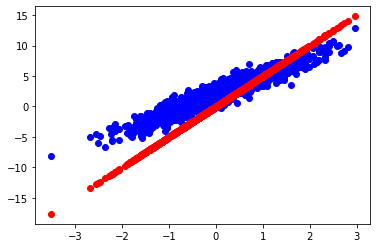

Current loss: 8.408135


In [22]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c ='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

# Define a training loop
With the network and training data, train the model using <b>gradient descent </b> to update the weights variable (W) and the bias variable (b) to reduce the loss. There are many variants of the gradient descent scheme that are captured in <code>tf.train.Optimizer</code> - our recommended implementation. But in the spirit of building the first principles, here you will implement the basic math yourself with the help of <code>tf.GradientTape</code> for automatic differentiation and <code>tf.assign_sub</code> for decrementing a value (which combines <code>tf.assign</code> and <code>tf.sub</code>)

In [25]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])

    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Finally, let's repeatedly run through the trianing data and see how W and b evolve.

Epoch: 0--- W=5.00 b=0.00 current_loss = 8.40814
Epoch: 1--- W=4.62 b=0.37 current_loss = 5.84265
Epoch: 2--- W=4.31 b=0.67 current_loss = 4.15903
Epoch: 3--- W=4.06 b=0.92 current_loss = 3.05409
Epoch: 4--- W=3.86 b=1.12 current_loss = 2.32890
Epoch: 5--- W=3.70 b=1.28 current_loss = 1.85293
Epoch: 6--- W=3.57 b=1.42 current_loss = 1.54052
Epoch: 7--- W=3.47 b=1.52 current_loss = 1.33546
Epoch: 8--- W=3.38 b=1.61 current_loss = 1.20085
Epoch: 9--- W=3.31 b=1.68 current_loss = 1.11249


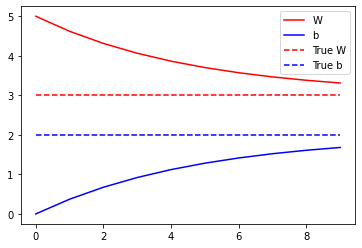

In [41]:
model = Model()

#Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)

for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())

    current_loss = loss(model(inputs), outputs)

    train(model, inputs, outputs, learning_rate = 0.1)

    print(f"Epoch: {epoch}--- W={Ws[-1]:.2f} b={bs[-1]:.2f} current_loss = {current_loss:.5f}")


#Let's plot
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')

plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()